In [138]:
#support vector machines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score,GridSearchCV
from sklearn.svm import SVC,SVR,LinearSVR

from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [139]:
df = pd.read_csv("mouse_viral_study.csv")

In [140]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


In [141]:
df.rename(columns={'Med_1_mL':'Med1','Med_2_mL':'Med2','Virus Present':'Virus'}, inplace=True)

In [142]:
df.columns

Index(['Med1', 'Med2', 'Virus'], dtype='object')

<Axes: xlabel='Med1', ylabel='Med2'>

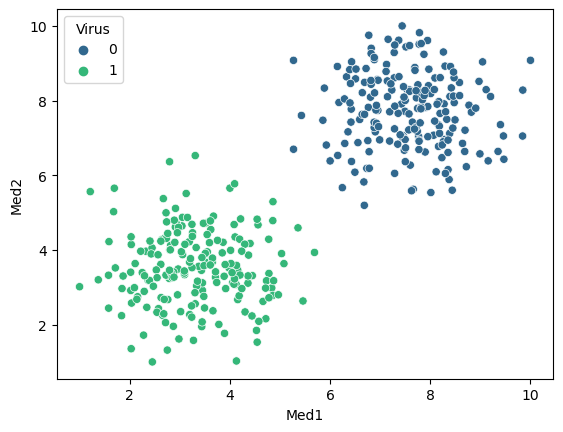

In [143]:
sns.scatterplot(x='Med1',y='Med2',hue='Virus',
                data=df,palette='viridis')

In [144]:
#help(SVC)
y = df['Virus']
X = df.drop('Virus',axis=1) 
model = SVC(kernel='linear', C=0.01,gamma='scale') #C is for regularization, how many points within the margin (inverse)
model.fit(X, y)

SVC(C=0.01, kernel='linear')

In [145]:
def plot_svmboundary(model,X,y):
    #convert to array
    X = X.values
    y = y.values
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='viridis')
 
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30) #creates linearly spaced arrays
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx) #make a 2D grid
    xy = np.vstack([XX.ravel(), YY.ravel()]).T #flatten and combine grid
    Z = model.decision_function(xy).reshape(XX.shape) #SVM decision boundary

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

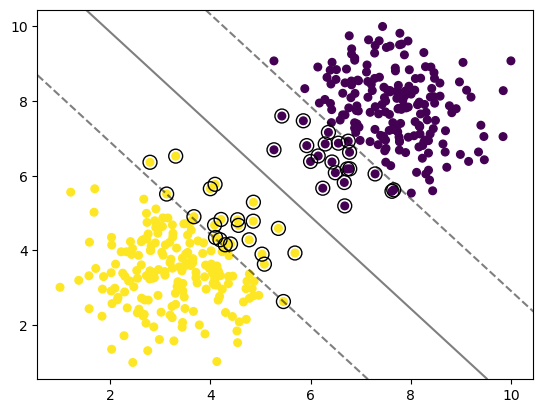

In [146]:
plot_svmboundary(model,X,y)

In [147]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,10],'kernel':['linear','rbf','poly','sigmoid'],'gamma':[0.0001,0.001,0.01,0.1]}
#gamma is how much influence single training example has, doesn't work for linear
grid = GridSearchCV(svm,param_grid)

In [148]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [149]:
grid.best_score_

1.0

In [150]:
grid.best_params_

{'C': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}